# Packager Analysis

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import csv
sns.set(font_scale=1.3, style="ticks")

def get_data(filename, filt=np.mean):
    with open(filename) as f:
        csv_reader = csv.reader(f)
        csv_reader = list(csv_reader)
    number_of_vnfs = [int(x[0]) for x in csv_reader[1:]]
    process_time = [x[1:11] for x in csv_reader[1:]]
    memory_usage = [x[11:21] for x in csv_reader[1:]]
    memory_usage_ps = [x[21:31] for x in csv_reader[1:]]

    process_time = [list(map(float, x)) for x in process_time]
    process_time = [filt(x) for x in process_time]

    memory_usage = [list(map(int, x)) for x in memory_usage]
    memory_usage = [filt(x) for x in memory_usage]

    memory_usage_ps = [list(map(int, x)) for x in memory_usage_ps]
    memory_usage_ps = [filt(x) for x in memory_usage_ps]

    return list(zip(number_of_vnfs, process_time, memory_usage, memory_usage_ps))

In [6]:
dat_t_vt = get_data("results_eu.5gtango_valid_level_t.csv")
dat_t_vs = get_data("results_eu.5gtango_valid_level_skip.csv")
dat_o_vt = get_data("results_eu.etsi.osm_valid_level_t.csv")
dat_o_vs = get_data("results_eu.etsi.osm_valid_level_skip.csv")
cols = ["n_vnfs", "runtime", "mem", "mem_ps"]

df_t_vt = pd.DataFrame(dat_t_vt)
df_t_vt.columns = cols
df_t_vt["setup"] = "5GTANGO, val=topo"
df_t_vt["mem_ps"] /= (1000 * 1000)
df_t_vs = pd.DataFrame(dat_t_vs)
df_t_vs.columns = cols
df_t_vs["setup"] = "5GTANGO, val=skip"
df_t_vs["mem_ps"] /= (1000 * 1000)
df_o_vt = pd.DataFrame(dat_o_vt)
df_o_vt.columns = cols
df_o_vt["setup"] = "OSM, val=topo"
df_o_vt["mem_ps"] /= (1000 * 1000)
df_o_vs = pd.DataFrame(dat_o_vs)
df_o_vs.columns = cols
df_o_vs["setup"] = "OSM, val=skip"
df_o_vs["mem_ps"] /= (1000 * 1000)

df = pd.concat([df_t_vt, df_t_vs, df_o_vt, df_o_vs], ignore_index=True)
df.head()

,n_vnfs,runtime,mem,mem_ps,setup
0,1,1.878437,50958.8,52.165018,"5GTANGO, val=topo"
1,2,1.929573,50935.6,52.146995,"5GTANGO, val=topo"
2,3,1.909964,50877.6,52.081869,"5GTANGO, val=topo"
3,4,1.974347,50970.4,52.173619,"5GTANGO, val=topo"
4,5,2.048193,50933.6,52.132659,"5GTANGO, val=topo"


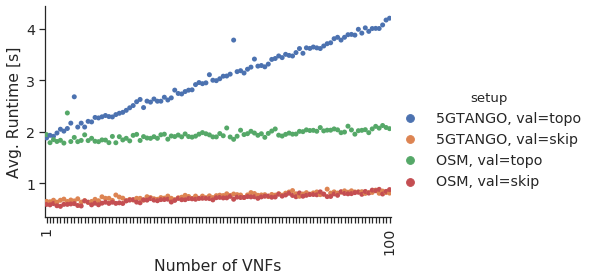

In [7]:
g = sns.catplot(data=df, x="n_vnfs", y="runtime", hue="setup", jitter=False, height=4, aspect=1.5)
#g.ax.set(ylim=(.5, 1.0))
ticks = ['' for x in range(0, 101)]
ticks[0] = 1
ticks[99] = 100
g.set_xticklabels(ticks, rotation=90)
g.set(xlabel="Number of VNFs", ylabel="Avg. Runtime [s]")
#plt.tight_layout()
plt.savefig("pack_runtimes.png", dpi=300)

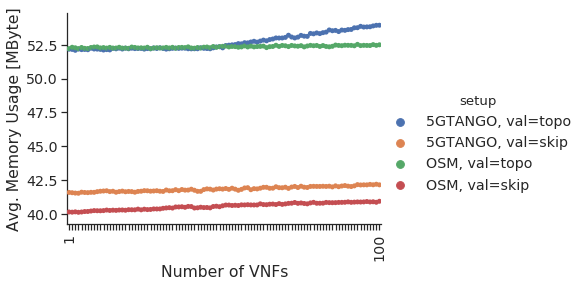

In [8]:
g = sns.catplot(data=df, x="n_vnfs", y="mem_ps", hue="setup", jitter=False, height=4, aspect=1.5)
#g.ax.set(ylim=(.5, 1.0))
ticks = ['' for x in range(0, 101)]
ticks[0] = 1
ticks[99] = 100
g.set_xticklabels(ticks, rotation=90)
g.set(xlabel="Number of VNFs", ylabel="Avg. Memory Usage [MByte]")
#plt.tight_layout()
plt.savefig("pack_memory.png", dpi=300)